# 1. Initialisation et Importation des Librairies

**Objectif :**
Préparer l'environnement Python en important les outils nécessaires pour l'analyse de données, la visualisation et le machine learning.

**Détail du Code et Variables :**
- `import pandas as pd` : Charge la librairie **Pandas**, essentielle pour manipuler des données sous forme de tableaux (DataFrames).
- `import numpy as np` : Charge **NumPy**, utilisé pour les calculs mathématiques performants.
- `import matplotlib.pyplot` & `seaborn` : Librairies de visualisation pour créer des graphiques.
- `warnings.filterwarnings('ignore')` : Désactive les messages d'avertissement non critiques pour garder la sortie propre.
- **Modules Scikit-Learn (`sklearn`)** :
  - `OneHotEncoder`, `OrdinalEncoder` : Pour transformer les textes en nombres.
  - `StandardScaler` : Pour mettre les chiffres à la même échelle.
  - `ColumnTransformer`, `Pipeline` : Pour automatiser les transformations.

**Résultat attendu :**
Affichage de "✅ Librairies importées". Aucune erreur ne doit apparaître, signifiant que tous les packages sont installés.

In [1]:
# 1. Initialisation et import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(' Librairies importées')

 Librairies importées


# 2. Chargement des Jeux de Données

**Objectif :**
Lire les fichiers CSV source et les stocker dans des variables (DataFrames) pour l'analyse.

**Détail du Code et Variables :**
- `PATH_...` : Constantes définissant l'emplacement des fichiers sur le disque.
- `pd.read_csv(PATH)` : Fonction Pandas qui lit un fichier texte séparé par des virgules et crée un DataFrame.
- **Variables créées :**
  - `general_data` : Données principales RH (âge, salaire, etc.).
  - `manager_survey` : Satisfaction vis-à-vis du management.
  - `employee_survey` : Satisfaction vis-à-vis de l'environnement.
  - `in_time` / `out_time` : Heures d'arrivée et de départ quotidiennes.

**Résultat attendu :**
Affichage des dimensions `(lignes, colonnes)` pour chaque table, confirmant que les données sont bien chargées (ex: 4410 employés).

In [2]:
# Chemins relatifs (exécution depuis la racine du projet)
PATH_GENERAL = 'data project IA/general_data.csv'
PATH_MANAGER = 'data project IA/manager_survey_data.csv'
PATH_EMPLOYEE = 'data project IA/employee_survey_data.csv'
PATH_IN_TIME = 'data project IA/in_out_time/in_time.csv'
PATH_OUT_TIME = 'data project IA/in_out_time/out_time.csv'

print(' Chargement des fichiers...')
general_data = pd.read_csv(PATH_GENERAL)
print(f'   ➜ general_data: {general_data.shape}')
manager_survey = pd.read_csv(PATH_MANAGER)
print(f'   ➜ manager_survey: {manager_survey.shape}')
employee_survey = pd.read_csv(PATH_EMPLOYEE)
print(f'   ➜ employee_survey: {employee_survey.shape}')
in_time = pd.read_csv(PATH_IN_TIME)
print(f'   ➜ in_time: {in_time.shape}')
out_time = pd.read_csv(PATH_OUT_TIME)
print(f'   ➜ out_time: {out_time.shape}')

print('Aperçus rapides :')
display(general_data.head(2))
display(manager_survey.head(2))
display(employee_survey.head(2))
display(in_time.iloc[:3, :5])

 Chargement des fichiers...
   ➜ general_data: (4410, 24)
   ➜ manager_survey: (4410, 3)
   ➜ employee_survey: (4410, 4)
   ➜ in_time: (4410, 262)
   ➜ out_time: (4410, 262)
Aperçus rapides :


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13


# 3. Préparation des Données Temporelles

**Objectif :**
Standardiser les tableaux d'heures (`in_time` et `out_time`) pour qu'ils soient exploitables.

**Détail du Code et Variables :**
- `df_in = in_time.copy()` : Crée une copie indépendante pour ne pas modifier l'original.
- `rename(columns={...})` : Renomme la première colonne (souvent vide ou nommée "Unnamed") en `EmployeeID` pour servir d'identifiant unique.
- `set_index('EmployeeID')` : Définit l'ID employé comme index des lignes. Cela permet d'aligner parfaitement les tableaux `in` et `out` pour faire des soustractions (départ - arrivée).

**Résultat attendu :**
Message confirmant le nombre de jours suivis (colonnes) et d'employés (lignes).

In [3]:
# Préparation : renommer la première colonne en EmployeeID si besoin, définir l'index
df_in = in_time.copy()
df_out = out_time.copy()

first_col_in = df_in.columns[0]
first_col_out = df_out.columns[0]

df_in.rename(columns={first_col_in: 'EmployeeID'}, inplace=True)
df_out.rename(columns={first_col_out: 'EmployeeID'}, inplace=True)
df_in.set_index('EmployeeID', inplace=True)
df_out.set_index('EmployeeID', inplace=True)

print(f' Jours tracés: {len(df_in.columns)}, employés: {len(df_in)}')

 Jours tracés: 261, employés: 4410


# 4. Conversion des Dates

**Objectif :**
Transformer les chaînes de caractères (ex: "2015-01-01 09:00") en objets temporels Python (`datetime`) pour pouvoir faire des calculs de durée.

**Détail du Code et Variables :**
- `pd.to_datetime(..., errors='coerce')` : Tente de convertir chaque valeur en date. Si la conversion échoue (case vide ou format invalide), la valeur devient `NaT` (Not a Time), l'équivalent temporel de `NaN`.
- `convert_to_datetime(df)` : Fonction utilitaire qui applique cette transformation à toutes les colonnes d'un DataFrame.

**Résultat attendu :**
Affichage de "🔄 Conversion datetime terminée". Les données sont maintenant prêtes pour des opérations mathématiques (soustractions).

In [4]:
# Conversion des colonnes en datetime (coerce errors -> NaT)
def convert_to_datetime(df):
    df_dt = df.copy()
    for col in df_dt.columns:
        df_dt[col] = pd.to_datetime(df_dt[col], errors='coerce')
    return df_dt

df_in_dt = convert_to_datetime(df_in)
df_out_dt = convert_to_datetime(df_out)
print(' Conversion datetime terminée')

 Conversion datetime terminée


# 5. Feature Engineering : Calcul des Horaires

**Objectif :**
Créer de nouvelles informations (features) résumant le comportement horaire de chaque employé.

**Détail du Code et Variables :**
- `work_duration = df_out_dt - df_in_dt` : Calcule la durée de présence brute pour chaque jour.
- `dt.total_seconds() / 3600` : Convertit chaque durée en **heures décimales** (ex: 7h30 -> 7.5).
- **Nouvelles Variables Calculées :**
  - `MeanDailyHours` : Durée moyenne de travail par jour.
  - `StdDailyHours` : Écart-type (variabilité) des horaires. Un chiffre élevé signifie des horaires irréguliers.
  - `WorkedDays` : Nombre de jours où l'employé était présent (ignorant les absences/congés).
  - `MeanArrivalHour` : Heure d'arrivée moyenne (ex: 9.5 pour 9h30).
  - `VarianceArrival` : Régularité de l'heure d'arrivée.

**Résultat attendu :**
Un tableau `df_horaires` synthétique résumant l'assiduité de chaque employé.

In [5]:
# Calcul des durées journalières en heures (out - in) et features agrégées par employé
work_duration = df_out_dt - df_in_dt
work_hours = work_duration.apply(lambda col: col.dt.total_seconds() / 3600)

mean_daily_hours = work_hours.mean(axis=1, skipna=True)
std_daily_hours = work_hours.std(axis=1, skipna=True)
worked_days = work_hours.notna().sum(axis=1)

# Heure d'arrivée en heures décimales + variance d'arrivée
arrival_hours = df_in_dt.apply(lambda col: col.dt.hour + col.dt.minute/60, axis=0)
mean_arrival_hour = arrival_hours.mean(axis=1, skipna=True)
variance_arrival = arrival_hours.var(axis=1, skipna=True)

df_horaires = pd.DataFrame({
    'EmployeeID': work_hours.index,
    'MeanDailyHours': mean_daily_hours.values,
    'StdDailyHours': std_daily_hours.values,
    'WorkedDays': worked_days.values,
    'MeanArrivalHour': mean_arrival_hour.values,
    'VarianceArrival': variance_arrival.values
})

df_horaires.reset_index(drop=True, inplace=True)
print(' Aperçu df_horaires:')
display(df_horaires.head())
print(f'Dimensions df_horaires: {df_horaires.shape}')

 Aperçu df_horaires:


,EmployeeID,MeanDailyHours,StdDailyHours,WorkedDays,MeanArrivalHour,VarianceArrival
0,1,7.373651,0.283224,232,9.993032,0.066799
1,2,7.718969,0.313351,236,9.980720,0.085904
2,3,7.013240,0.311551,242,10.016598,0.074263
3,4,7.193678,0.284133,235,9.973830,0.079947
4,5,8.006175,0.300656,245,9.990068,0.073366


Dimensions df_horaires: (4410, 6)


# 6. Fusion des Données (Merging)

**Objectif :**
Rassembler toutes les informations éparses en une seule vue consolidée.

**Détail du Code et Variables :**
- `merge(..., on='EmployeeID', how='left')` : Jointure de type "gauche". On garde tous les employés de la table de gauche (`general_data`) et on y colle les infos correspondantes des autres tables.
- `df` : Le DataFrame final qui grandit à chaque étape de fusion.

**Résultat attendu :**
Le `df` final doit avoir 4410 lignes (nombre d'employés) et environ 30+ colonnes combinant RH, sondages et horaires.

In [6]:
# Fusion successive (left joins) sur EmployeeID
df = general_data.merge(manager_survey, on='EmployeeID', how='left')
df = df.merge(employee_survey, on='EmployeeID', how='left')
df = df.merge(df_horaires, on='EmployeeID', how='left')
print(f'Après fusion : {df.shape}')

Après fusion : (4410, 34)


# 7. Nettoyage : Suppression de Colonnes Inutiles

**Objectif :**
Alléger le jeu de données en retirant les colonnes qui n'apportent aucune information utile (valeurs constantes).

**Détail du Code et Variables :**
- `cols_to_drop` : Liste des colonnes suspectes.
  - `EmployeeCount` : Vaut 1 pour tout le monde.
  - `Over18` : Tous les employés sont majeurs ('Y').
  - `StandardHours` : Fixé à 8h pour tous.
- `drop(columns=...)` : Supprime ces colonnes du DataFrame.

**Résultat attendu :**
Affichage des colonnes supprimées. Le modèle d'IA ne peut pas apprendre d'une variable qui ne varie jamais, leur suppression est donc bénéfique.

In [7]:
# Suppression des colonnes non informatives si elles existent
cols_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']
existing = [c for c in cols_to_drop if c in df.columns]
if existing:
    df.drop(columns=existing, inplace=True)
    print(f'Colonnes supprimées : {existing}')
else:
    print('Aucune colonne à supprimer parmi la liste standard')
print(f'Dimensions après suppression : {df.shape}')

Colonnes supprimées : ['EmployeeCount', 'Over18', 'StandardHours']
Dimensions après suppression : (4410, 31)


# 8. Analyse des Valeurs Manquantes

**Objectif :**
Identifier les trous dans les données pour décider comment les combler.

**Détail du Code et Variables :**
- `missing = df.isnull().sum()` : Compte le nombre de cases vides (`NaN`) pour chaque colonne.
- `missing_pct` : Calcule le pourcentage de vide. `(Nombre de vides / Nombre total de lignes) * 100`.
- `missing_df` : DataFrame temporaire créé pour afficher joliment ces statistiques.

**Résultat attendu :**
Un tableau montrant les colonnes critiques. Par exemple, si `WorkLifeBalance` a 0.8% de vides, on sait qu'il faudra traiter ces quelques cas.

In [8]:
# Analyse des NaN par colonne
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct.round(3)})
missing_df = missing_df[missing_df['missing_count']>0].sort_values('missing_pct', ascending=False)
print(' Valeurs manquantes (colonnes avec NaN) :')
display(missing_df)

 Valeurs manquantes (colonnes avec NaN) :


,missing_count,missing_pct
WorkLifeBalance,38,0.862
EnvironmentSatisfaction,25,0.567
JobSatisfaction,20,0.454
NumCompaniesWorked,19,0.431
TotalWorkingYears,9,0.204


# 9. Imputation et Nettoyage des Valeurs Manquantes

**Objectif :**
Remplir les trous intelligemment pour ne pas perdre de données, ou supprimer les lignes irrécupérables.

**Détail du Code et Variables :**
- `satisfaction_cols` : Liste des colonnes d'opinion (1 à 4). Comme ce sont des catégories ordonnées, on remplace les vides par la **médiane** (valeur centrale) plutôt que la moyenne.
- `fillna(median_val)` : Remplace les `NaN` par la médiane calculée.
- **Boucle de suppression :** Pour les autres colonnes (ex: `TotalWorkingYears`), si le manque est minime (< 1%), on supprime simplement les lignes (`dropna`). C'est plus sûr que d'inventer une valeur pour l'ancienneté.

**Résultat attendu :**
Un jeu de données `df` complet sans aucune valeur manquante (`NaN`). Le nombre de lignes supprimées devrait être faible.

In [9]:
# Imputer les colonnes de satisfaction par la médiane
satisfaction_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
for col in satisfaction_cols:
    if col in df.columns:
        n_missing = df[col].isnull().sum()
        if n_missing>0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Imputation {col}: {n_missing} valeurs remplacées par la médiane ({median_val})")

# Pour les autres colonnes avec < 1% de NaN, supprimer les lignes concernées
initial_rows = len(df)
for col in df.columns:
    if col not in satisfaction_cols:
        pct = df[col].isnull().sum() / len(df) * 100
        if 0 < pct < 1:
            n = df[col].isnull().sum()
            df = df.dropna(subset=[col])
            print(f"Suppression {n} lignes pour {col} ({pct:.3f}%)")
final_rows = len(df)
print(f'Lignes supprimées au total: {initial_rows - final_rows}')
print(f'Dimensions après gestion NaN: {df.shape}')

Imputation EnvironmentSatisfaction: 25 valeurs remplacées par la médiane (3.0)
Imputation JobSatisfaction: 20 valeurs remplacées par la médiane (3.0)
Imputation WorkLifeBalance: 38 valeurs remplacées par la médiane (3.0)
Suppression 19 lignes pour NumCompaniesWorked (0.431%)
Suppression 9 lignes pour TotalWorkingYears (0.205%)
Lignes supprimées au total: 28
Dimensions après gestion NaN: (4382, 31)


# 10. Encodage de la Cible (Target Encoding)

**Objectif :**
Préparer la variable que l'on veut prédire (`Attrition`) en la convertissant en format numérique binaire.

**Détail du Code et Variables :**
- `map({'Yes': 1, 'No': 0})` : Transforme le texte 'Yes' (départ) en **1** et 'No' (reste) en **0**.
- `y = df['Attrition']` : Isole la cible dans une variable `y`.
- `X = df.drop(...)` : Met tout le reste (les caractéristiques) dans une variable `X`, en retirant la réponse (`Attrition`) et l'identifiant (`EmployeeID` qui ne sert pas à prédire).

**Résultat attendu :**
Deux matrices : `X` contient les données d'apprentissage, `y` contient les réponses (0 ou 1).

In [10]:
# Encoder la cible Attrition (Yes -> 1, No -> 0) et séparer X/y
if 'Attrition' in df.columns:
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
else:
    raise KeyError('Colonne Attrition introuvable dans le DataFrame fusionné')

y = df['Attrition']
X = df.drop(columns=['Attrition', 'EmployeeID'])
print(f'X: {X.shape}, y: {y.shape}')

X: (4382, 29), y: (4382,)


# 11. Typage des Variables

**Objectif :**
Classer chaque colonne selon son type pour lui appliquer le bon traitement mathématique.

**Détail du Code et Variables :**
- **Ordinales (`ordinal_cols`)** : Catégories avec un sens de hiérarchie (ex: Éducation 1 < 2 < 3). On gardera cet ordre.
- **Nominales (`nominal_cols`)** : Catégories sans ordre (ex: Département RH vs Vente). On devra créer une colonne par catégorie (One-Hot).
- **Numériques (`numerical_cols`)** : Chiffres classiques (Âge, Salaire). On devra les normaliser.

**Résultat attendu :**
Trois listes de noms de colonnes qui couvrent l'intégralité de `X`.

In [11]:
# Définition des colonnes selon leur type (conserver uniquement celles qui existent)
ordinal_cols = [
    'Education', 'JobLevel', 'JobInvolvement', 'PerformanceRating',
    'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'StockOptionLevel'
]
nominal_cols = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'
]

ordinal_cols = [c for c in ordinal_cols if c in X.columns]
nominal_cols = [c for c in nominal_cols if c in X.columns]

all_categorical = ordinal_cols + nominal_cols
numerical_cols = [c for c in X.columns if c not in all_categorical and X[c].dtype in ['int64', 'float64']]

print(f'Ordinales ({len(ordinal_cols)}): {ordinal_cols}')
print(f'Nominales ({len(nominal_cols)}): {nominal_cols}')
print(f'Numériques ({len(numerical_cols)}): {numerical_cols}')

Ordinales (8): ['Education', 'JobLevel', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'StockOptionLevel']
Nominales (6): ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
Numériques (15): ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MeanDailyHours', 'StdDailyHours', 'WorkedDays', 'MeanArrivalHour', 'VarianceArrival']


# 12. Création du Preprocessor (ColumnTransformer)

**Objectif :**
Construire une "machine" (Pipeline) qui transforme automatiquement les données brutes en données digestes pour l'algorithme.

**Détail du Code et Variables :**
- `OrdinalEncoder` : Transforme "Faible", "Moyen", "Fort" en 0, 1, 2.
- `OneHotEncoder` : Transforme "Vente" en `[1, 0, 0]` et "RH" en `[0, 1, 0]`.
- `StandardScaler` : Transforme un salaire de 50000 en "score Z" (combien d'écarts-types par rapport à la moyenne). Cela évite que les gros chiffres (salaire) écrasent les petits (âge).
- `ColumnTransformer` : Combine ces 3 méthodes pour qu'elles s'appliquent chacune aux bonnes colonnes.

**Résultat attendu :**
Un objet `preprocessor` prêt à l'emploi. Aucune donnée n'est encore transformée à ce stade.

In [12]:
# Construction du ColumnTransformer (preprocessor)
ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
nominal_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_cols),
        ('nom', nominal_transformer, nominal_cols),
        ('num', numerical_transformer, numerical_cols)
    ],
    remainder='passthrough'
)
print(' Preprocessor créé')

 Preprocessor créé


# 13. Séparation Train / Test

**Objectif :**
Diviser les données pour simuler un examen : on révise sur une partie (Train) et on est noté sur une partie jamais vue (Test).

**Détail du Code et Variables :**
- `train_test_split` : Fonction de découpage aléatoire.
- `test_size=0.2` : Garde 20% des données pour le test.
- `stratify=y` : **Crucial**. Assure qu'il y a la même proportion de départs (Attrition=1) dans le Train et le Test. Sans ça, le test pourrait ne contenir aucun départ par malchance.

**Résultat attendu :**
Quatre tableaux : `X_train`, `y_train` (80%) et `X_test`, `y_test` (20%).

In [13]:
# Split Train/Test (80/20) avec stratify=y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}')
print('Répartition cible (train/test):')
print(y_train.value_counts(normalize=True).round(4) * 100)
print(y_test.value_counts(normalize=True).round(4) * 100)

X_train: (3505, 29), X_test: (877, 29)
Répartition cible (train/test):
Attrition
0    83.91
1    16.09
Name: proportion, dtype: float64
Attrition
0    83.92
1    16.08
Name: proportion, dtype: float64


# 14. Application du Prétraitement

**Objectif :**
Lancer la transformation des données via le preprocessor configuré plus tôt.

**Détail du Code et Variables :**
- `fit_transform(X_train)` : Le preprocessor "apprend" les moyennes/écarts-types sur le Train puis transforme le Train.
- `transform(X_test)` : Il applique les mêmes règles au Test **sans ré-apprendre**. C'est fondamental pour ne pas tricher (data leakage).

**Résultat attendu :**
Des matrices NumPy (`X_train_processed`) remplies de chiffres, prêtes pour l'IA, difficiles à lire pour un humain mais parfaites pour l'algorithme.

In [14]:
# Appliquer le preprocessor (fit sur train, transform sur test) — optionnel mais démonstratif
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print(f'X_train_processed: {X_train_processed.shape}, X_test_processed: {X_test_processed.shape}')

X_train_processed: (3505, 49), X_test_processed: (877, 49)


# 15. Statistiques Descriptives

**Objectif :**
Vérifier la cohérence des données chiffrées.

**Détail du Code et Variables :**
- `describe()` : Génère un tableau avec Moyenne, Min, Max, Quartiles.
- `skew()` (Asymétrie) : Mesure si la distribution penche d'un côté. 
  - Skew > 1 : "Queue" vers la droite (ex: beaucoup de petits salaires, quelques très gros).
  - Skew proche de 0 : Distribution symétrique (cloche).

**Résultat attendu :**
Compréhension de la forme des données. Par exemple, l'ancienneté (`YearsAtCompany`) est souvent très asymétrique (beaucoup de nouveaux, peu d'anciens).

In [15]:
# Statistiques descriptives et skewness
numeric_for_stats = [c for c in numerical_cols if c in df.columns] + ['Attrition']
numeric_for_stats = [c for c in numeric_for_stats if c in df.columns]
print('Statistiques descriptives — variables numériques:')
display(df[numeric_for_stats].describe().round(3))

print('Asymétrie (skewness):')
display(df[numerical_cols].skew().sort_values(ascending=False).round(3))

Statistiques descriptives — variables numériques:


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MeanDailyHours,StdDailyHours,WorkedDays,MeanArrivalHour,VarianceArrival,Attrition
count,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000,4382.000
mean,36.933,9.199,65061.702,2.693,15.211,11.290,2.798,7.010,2.192,4.126,7.701,0.300,236.272,9.992,0.077,0.161
std,9.137,8.105,47142.310,2.498,3.663,7.786,1.289,6.129,3.225,3.570,1.341,0.014,5.498,0.018,0.007,0.367
min,18.000,1.000,10090.000,0.000,11.000,0.000,0.000,0.000,0.000,0.000,5.951,0.255,225.000,9.929,0.055,0.000
25%,30.000,2.000,29110.000,1.000,12.000,6.000,2.000,3.000,0.000,2.000,6.668,0.290,232.000,9.980,0.072,0.000
50%,36.000,7.000,49190.000,2.000,14.000,10.000,3.000,5.000,1.000,3.000,7.407,0.300,236.000,9.992,0.077,0.000
75%,43.000,14.000,83790.000,4.000,18.000,15.000,3.000,9.000,3.000,7.000,8.365,0.309,241.000,10.003,0.082,0.000
max,60.000,29.000,199990.000,9.000,25.000,40.000,6.000,40.000,15.000,17.000,11.031,0.345,248.000,10.070,0.104,1.000


Asymétrie (skewness):


YearsSinceLastPromotion    1.981
YearsAtCompany             1.765
MonthlyIncome              1.367
TotalWorkingYears          1.115
NumCompaniesWorked         1.029
DistanceFromHome           0.956
MeanDailyHours             0.863
YearsWithCurrManager       0.834
PercentSalaryHike          0.820
TrainingTimesLastYear      0.552
Age                        0.413
VarianceArrival            0.175
MeanArrivalHour            0.002
WorkedDays                -0.003
StdDailyHours             -0.018
dtype: float64

# 16. Visualisation : Histogrammes

**Objectif :**
Voir graphiquement la répartition des variables clés.

**Détail du Code et Variables :**
- `plt.subplots` : Crée une grille de graphiques vide.
- `hist(bins=30)` : Dessine un histogramme avec 30 barres (intervalles).
- Boucle `for` : Parcourt la liste `key_numerical` pour générer un graphique par variable.

**Résultat attendu :**
Une planche de graphiques. On cherche à voir des formes normales (Gaussiennes) ou des pics étranges.

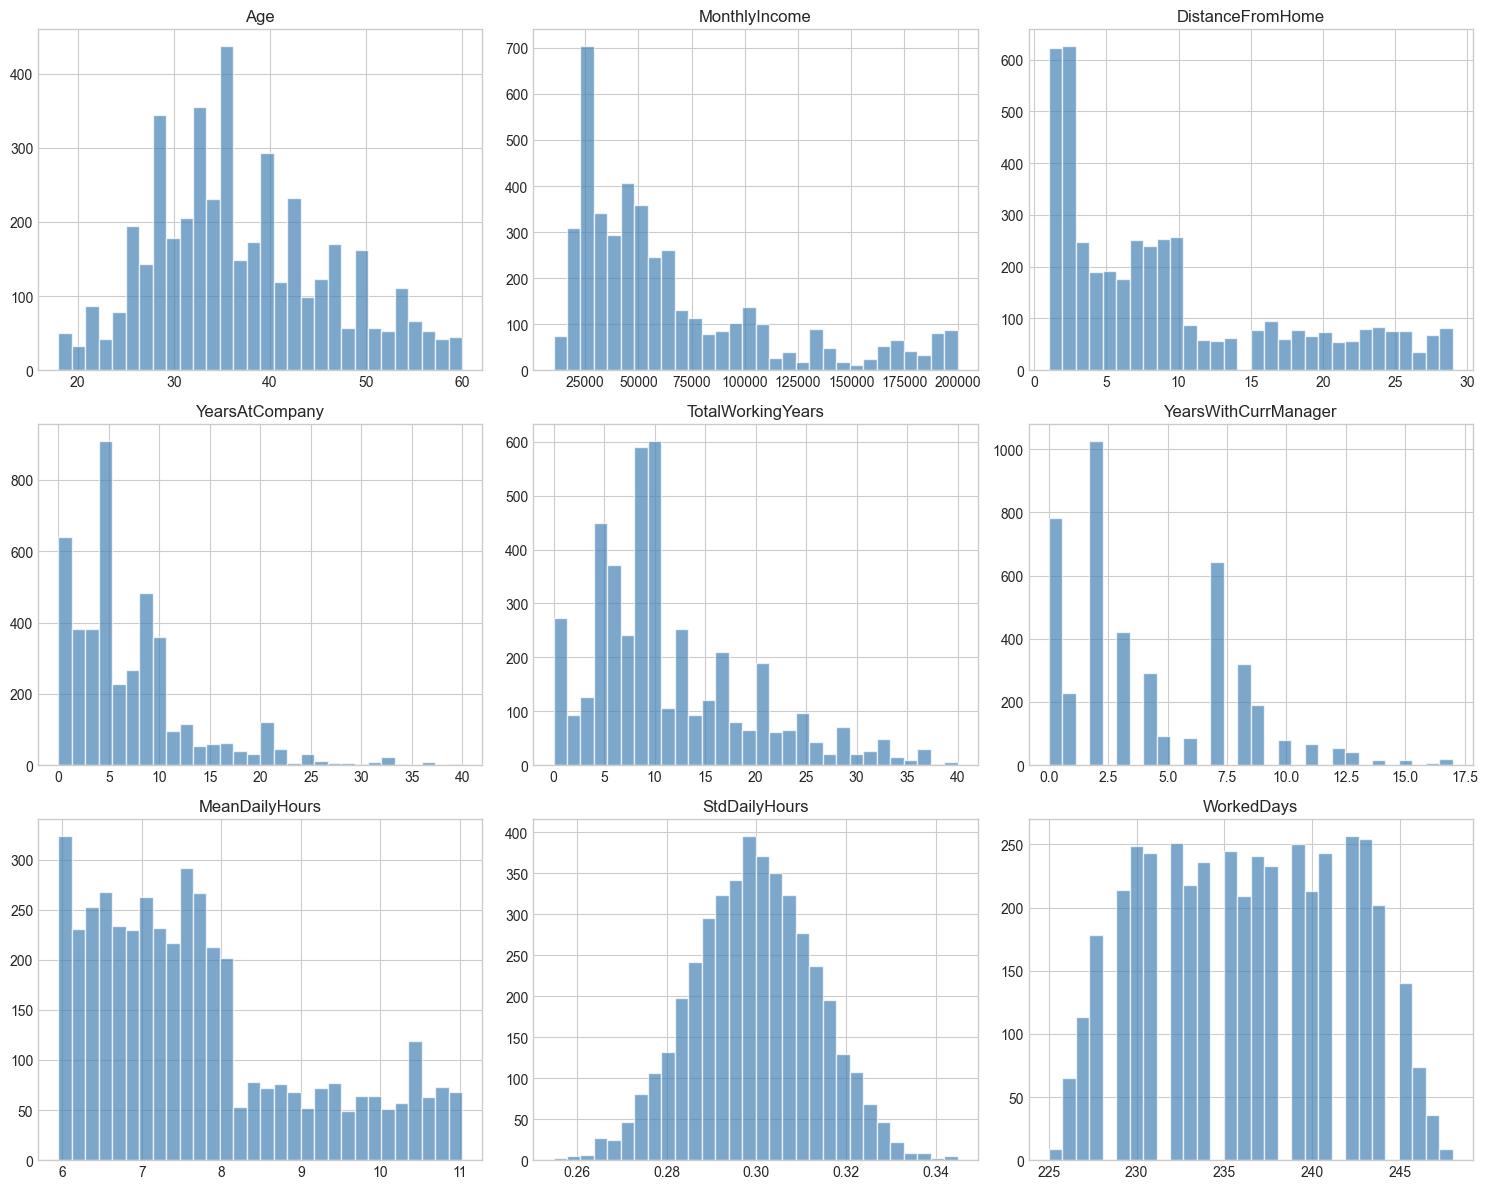

In [16]:
# Histogrammes des variables numériques clés
key_numerical = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany',
                 'TotalWorkingYears', 'YearsWithCurrManager', 'MeanDailyHours',
                 'StdDailyHours', 'WorkedDays']
key_numerical = [c for c in key_numerical if c in df.columns]

if len(key_numerical)>0:
    n_cols = 3
    n_rows = (len(key_numerical) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten()
    for i, col in enumerate(key_numerical):
        ax = axes[i]
        df[col].hist(bins=30, ax=ax, color='steelblue', edgecolor='white', alpha=0.7)
        ax.set_title(col)
    for j in range(len(key_numerical), len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
else:
    print('Aucune variable numérique clé trouvée pour les histogrammes')

# 17. Analyse des Corrélations

**Objectif :**
Détecter les liens linéaires : "Quand X augmente, est-ce que Y augmente aussi ?"

**Détail du Code et Variables :**
- `corr()` : Calcule le coefficient de corrélation (entre -1 et 1).
- `heatmap` : Affiche ces chiffres sous forme de couleurs (Rouge = forte corrélation positive, Bleu = négative).
- `attr_corr` : On isole la colonne 'Attrition' pour voir quelles variables font partir les gens (corrélation positive) ou rester (négative).

**Résultat attendu :**
Identification des facteurs clés (ex: Âge, Salaire) qui influencent le départ.

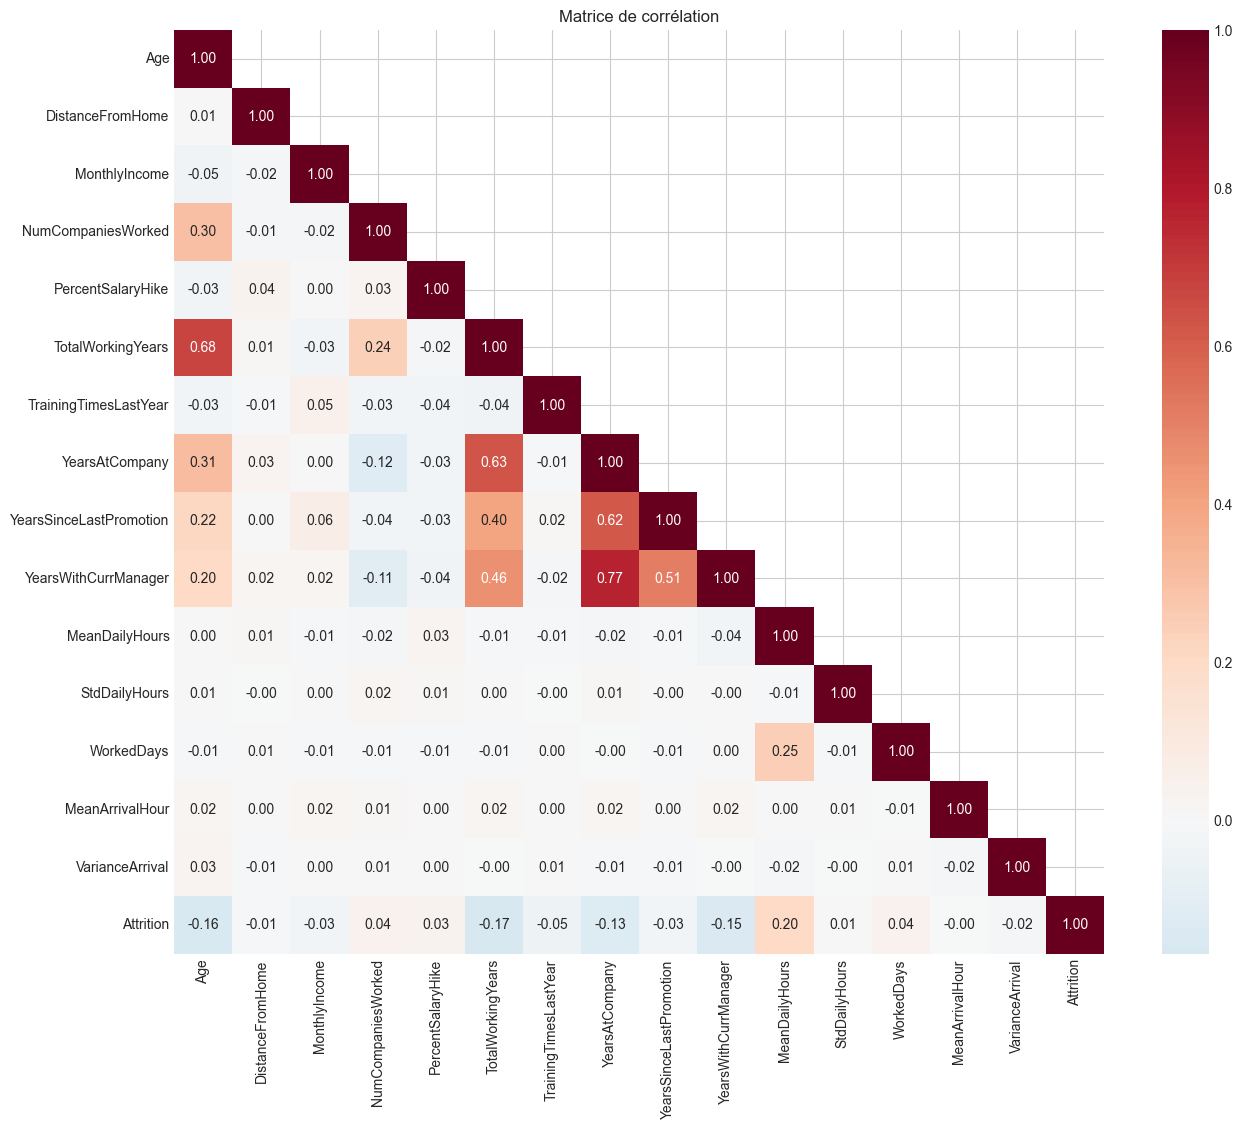

Top corrélations avec Attrition:


MeanDailyHours             0.199
TotalWorkingYears          0.170
Age                        0.158
YearsWithCurrManager       0.155
YearsAtCompany             0.133
TrainingTimesLastYear      0.048
NumCompaniesWorked         0.043
WorkedDays                 0.042
PercentSalaryHike          0.033
YearsSinceLastPromotion    0.031
Name: Attrition, dtype: float64

In [17]:
# Heatmap de corrélation (incluant Attrition)
corr_cols = [c for c in (numerical_cols + ['Attrition']) if c in df.columns]
if len(corr_cols) > 1:
    corr_matrix = df[corr_cols].corr()
    plt.figure(figsize=(15,12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0)
    plt.title('Matrice de corrélation')
    plt.show()
    attr_corr = corr_matrix['Attrition'].drop('Attrition').abs().sort_values(ascending=False)
    print('Top corrélations avec Attrition:')
    display(attr_corr.head(10).round(3))
else:
    print('Pas assez de colonnes numériques pour calculer la corrélation')

# 18. Analyse Bi-variée et Catégorielle

**Objectif :**
Comprendre qui part le plus selon son profil (Job, Statut Marital).

**Détail du Code et Variables :**
- **Barplots** : Calcule le taux de départ moyen (`mean()`) pour chaque catégorie (ex: Vendeurs vs Directeurs). La ligne rouge représente la moyenne globale pour comparer.
- **Boxplots** : Compare la distribution d'une variable (ex: Âge) entre ceux qui partent (Rouge) et ceux qui restent (Vert). Si les boîtes sont décalées, la variable est discriminante.

**Résultat attendu :**
Insights métier (ex: "Les célibataires partent 2x plus que les mariés", "Les jeunes partent plus que les seniors").

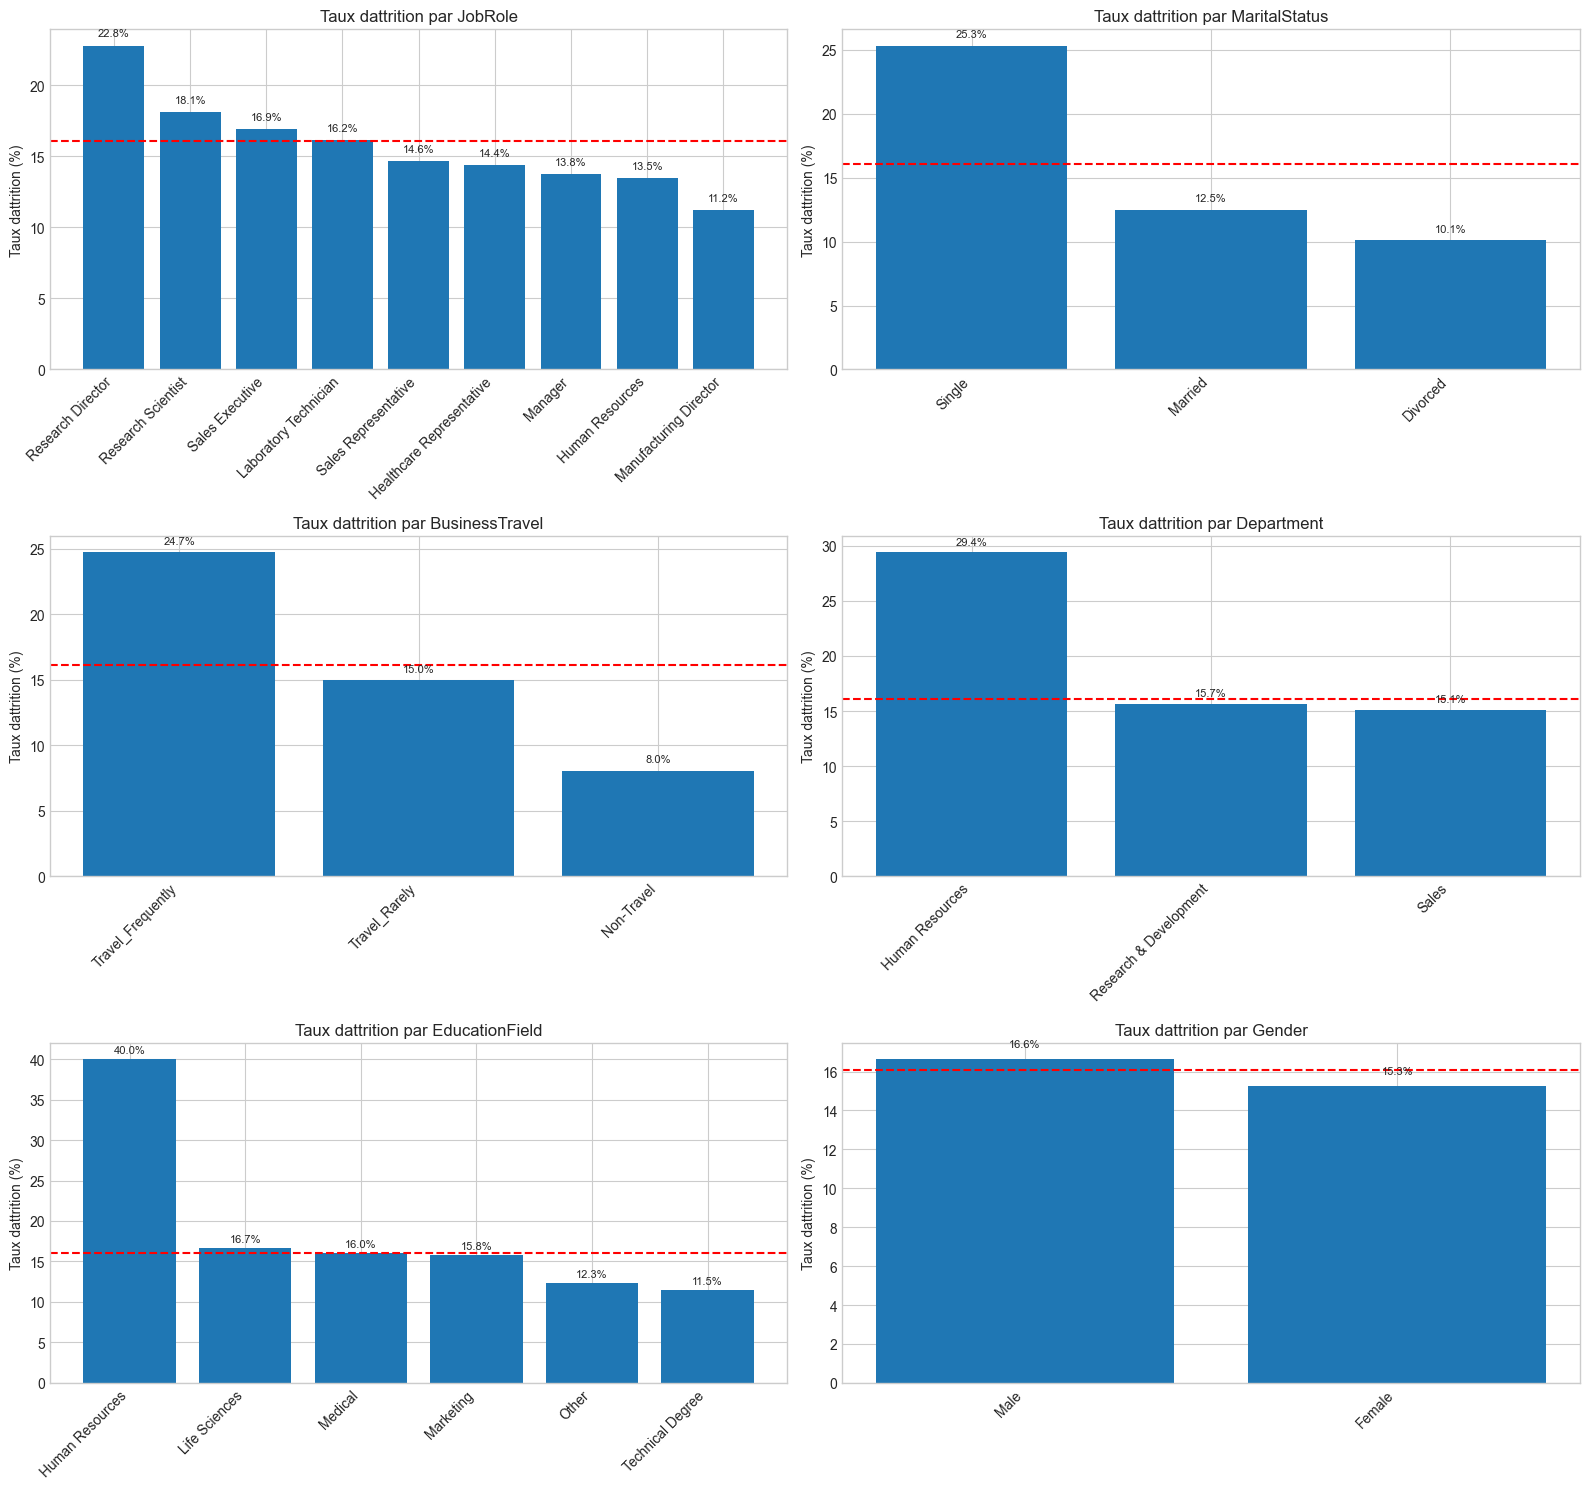

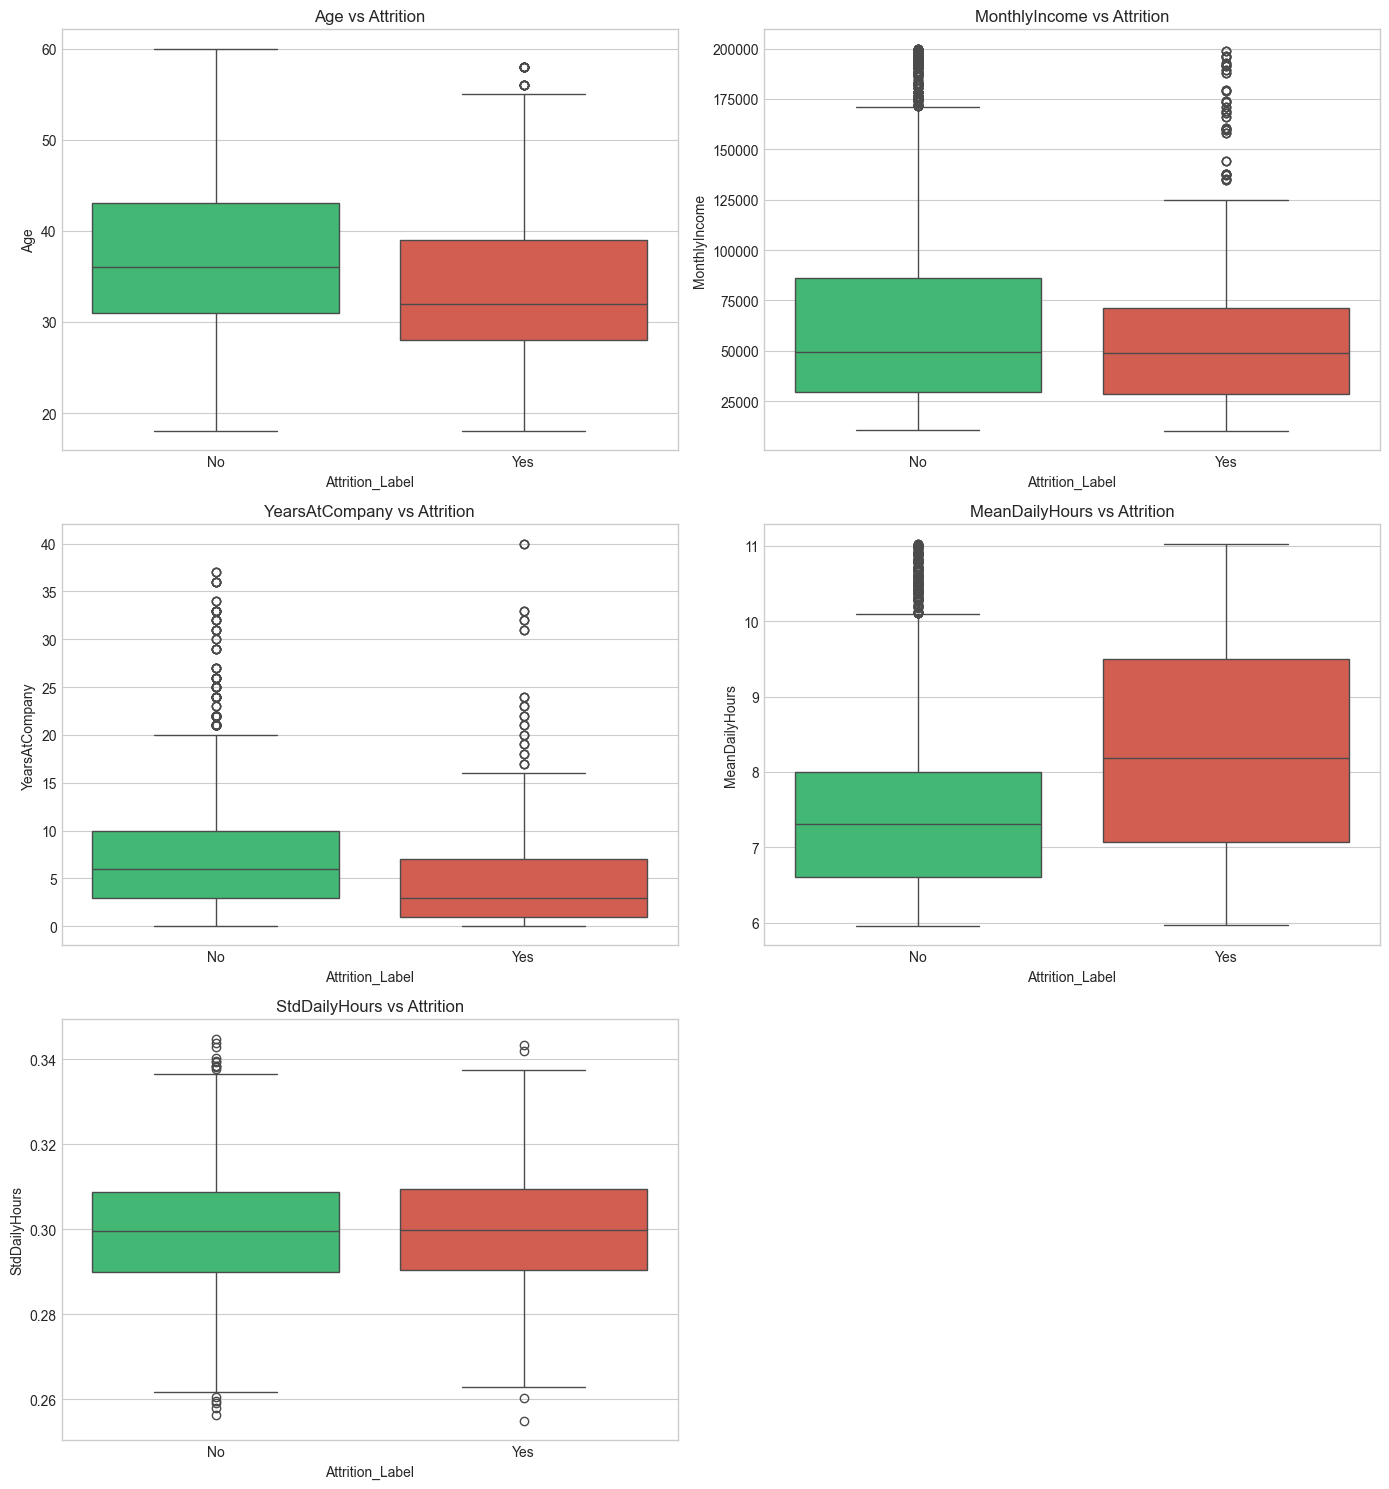

In [18]:
# Barplot du taux d'attrition par JobRole (et autres catégories) + Boxplots
categorical_vars = ['JobRole', 'MaritalStatus', 'BusinessTravel', 'Department', 'EducationField', 'Gender']
categorical_vars = [c for c in categorical_vars if c in df.columns]
if len(categorical_vars)>0:
    n_plots = len(categorical_vars)
    n_cols_plot = 2
    n_rows_plot = (n_plots + n_cols_plot - 1) // n_cols_plot
    fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(16, 5*n_rows_plot))
    axes = axes.flatten()
    for i, col in enumerate(categorical_vars):
        ax = axes[i]
        rates = df.groupby(col)['Attrition'].mean() * 100
        rates = rates.sort_values(ascending=False)
        bars = ax.bar(range(len(rates)), rates.values, color='tab:blue')
        ax.set_xticks(range(len(rates)))
        ax.set_xticklabels(rates.index, rotation=45, ha='right')
        ax.set_ylabel('Taux dattrition (%)')
        ax.set_title(f'Taux dattrition par {col}')
        ax.axhline(y=df['Attrition'].mean()*100, color='red', linestyle='--')
        for bar, val in zip(bars, rates.values):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.5, f'{val:.1f}%', ha='center', va='bottom', fontsize=8)
    for j in range(n_plots, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
else:
    print('Aucune variable catégorielle sélectionnée pour les barplots')

# Boxplots pour quelques variables numériques vs Attrition
vars_box = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'MeanDailyHours', 'StdDailyHours']
vars_box = [c for c in vars_box if c in df.columns]
if len(vars_box)>0:
    df_plot = df.copy()
    df_plot['Attrition_Label'] = df_plot['Attrition'].map({0: 'No', 1: 'Yes'})
    n_plots = len(vars_box)
    n_cols_plot = 2
    n_rows_plot = (n_plots + n_cols_plot - 1) // n_cols_plot
    fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(14, 5*n_rows_plot))
    axes = axes.flatten()
    palette = {'No':'#2ecc71', 'Yes':'#e74c3c'}
    for i, col in enumerate(vars_box):
        ax = axes[i]
        sns.boxplot(data=df_plot, x='Attrition_Label', y=col, ax=ax, palette=palette)
        ax.set_title(f'{col} vs Attrition')
    for j in range(n_plots, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
else:
    print('Aucune variable numérique sélectionnée pour les boxplots')

# 19. Analyse du Déséquilibre de Classe

**Objectif :**
Quantifier la difficulté du problème de prédiction.

**Détail du Code et Variables :**
- `value_counts()` : Compte combien de 0 (Restent) et de 1 (Partent).
- `Pie chart` : Affiche ces proportions en camembert.
- **Signification** : Si on a 85% de "No" et 15% de "Yes", l'IA pourrait être tentée de toujours dire "No" pour avoir 85% de réussite. Il faudra surveiller cela.

**Résultat attendu :**
Confirmation visuelle du déséquilibre (généralement peu de départs).

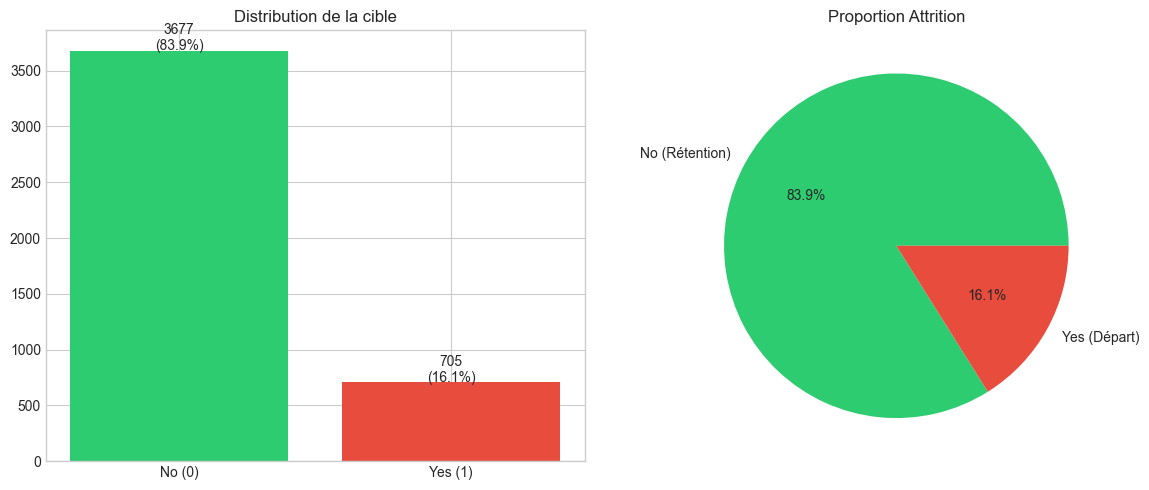

Ratio No/Yes: 5.22:1


In [19]:
# Analyse du déséquilibre de classe
counts = df['Attrition'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].bar(['No (0)', 'Yes (1)'], counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribution de la cible')
for i, v in enumerate(counts.values):
    pct = v / len(df) * 100
    axes[0].text(i, v + 5, f'{v}\n({pct:.1f}%)', ha='center')

axes[1].pie(counts.values, labels=['No (Rétention)', 'Yes (Départ)'], autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Proportion Attrition')
plt.tight_layout()
plt.show()

ratio = counts.iloc[0] / counts.iloc[1] if counts.iloc[1] > 0 else np.nan
print(f'Ratio No/Yes: {ratio:.2f}:1')

# 20. Conclusion et Sauvegarde

**Objectif :**
Finaliser le travail et enregistrer les fichiers propres pour l'étape suivante (Modélisation).

**Détail du Code et Variables :**
- `to_csv(..., index=False)` : Sauvegarde le DataFrame propre sur le disque sans la colonne d'index inutile.
- `joblib.dump` : Sauvegarde "l'intelligence" du preprocessor pour pouvoir réutiliser exactement les mêmes règles de transformation sur de nouvelles données futures.

**Résultat attendu :**
Message de succès. Les fichiers `.csv` et `.joblib` apparaissent dans le dossier du projet.

In [20]:
# Conclusion et sauvegarde
print('Résumé rapide :')
print(f" - Dataset final: {df.shape[0]} lignes, {df.shape[1]} colonnes")
print(f" - Variables numériques: {len(numerical_cols)}")
print(f" - Variables catégorielles: {len(ordinal_cols) + len(nominal_cols)}")

# Afficher les top facteurs corrélés si calculés
try:
    print('\nTop facteurs corrélés à l\'attrition:')
    display(attr_corr.head(5).round(3))
except Exception:
    pass

# Distribution de la cible
counts = df['Attrition'].value_counts()
print('\nDistribution de la cible:')
print(counts)
if counts.size >= 2 and counts.iloc[1] > 0:
    ratio = counts.iloc[0] / counts.iloc[1]
    print(f"Ratio No/Yes: {ratio:.2f}:1")
else:
    print('Ratio non calculable')

# Sauvegardes
print('\nSauvegarde du DataFrame nettoyé...')
df.to_csv('data_project_ia_merged_cleaned.csv', index=False)
print(' -> data_project_ia_merged_cleaned.csv')

# Sauvegarder le preprocessor (si présent)
try:
    import joblib
    joblib.dump(preprocessor, 'preprocessor.joblib')
    print(' -> preprocessor.joblib sauvegardé')
except Exception as e:
    print(f"Impossible d'enregistrer le preprocessor: {e}")

# Sauvegarder les matrices prétraitées (optionnel)
try:
    np.save('X_train_processed.npy', X_train_processed)
    np.save('X_test_processed.npy', X_test_processed)
    print(' -> X_train_processed.npy, X_test_processed.npy sauvegardés')
except Exception as e:
    print(f"Impossible d'enregistrer les matrices prétraitées: {e}")

print('\n Conclusion et sauvegardes terminées.')

Résumé rapide :
 - Dataset final: 4382 lignes, 31 colonnes
 - Variables numériques: 15
 - Variables catégorielles: 14

Top facteurs corrélés à l'attrition:


MeanDailyHours          0.199
TotalWorkingYears       0.170
Age                     0.158
YearsWithCurrManager    0.155
YearsAtCompany          0.133
Name: Attrition, dtype: float64


Distribution de la cible:
Attrition
0    3677
1     705
Name: count, dtype: int64
Ratio No/Yes: 5.22:1

Sauvegarde du DataFrame nettoyé...
 -> data_project_ia_merged_cleaned.csv
 -> preprocessor.joblib sauvegardé
 -> X_train_processed.npy, X_test_processed.npy sauvegardés

 Conclusion et sauvegardes terminées.
